In [1]:
import acquire
import prepare
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = prepare.get_q6_eda_df()

In [3]:
df.head()

,path,user_id,cohort_id,ip,name,start_date,end_date,created_at,updated_at,program_id,date_time
0,/,1,8.0,97.105.19.61,hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,full_stack_php,2018-01-26 09:55:03
1,java-ii,1,8.0,97.105.19.61,hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,full_stack_php,2018-01-26 09:56:02
2,java-ii/object-oriented-programming,1,8.0,97.105.19.61,hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,full_stack_php,2018-01-26 09:56:05
3,slides/object_oriented_programming,1,8.0,97.105.19.61,hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,full_stack_php,2018-01-26 09:56:06
4,javascript-i/conditionals,2,22.0,97.105.19.61,teddy,2018-01-08,2018-05-17,2018-01-08 13:59:10,2018-01-08 13:59:10,full_stack_java,2018-01-26 09:56:24


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 900223 entries, 0 to 900222
Data columns (total 11 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   path        900222 non-null  object        
 1   user_id     900223 non-null  int64         
 2   cohort_id   847330 non-null  float64       
 3   ip          900223 non-null  object        
 4   name        847330 non-null  object        
 5   start_date  847330 non-null  datetime64[ns]
 6   end_date    847330 non-null  datetime64[ns]
 7   created_at  847330 non-null  datetime64[ns]
 8   updated_at  847330 non-null  datetime64[ns]
 9   program_id  847330 non-null  object        
 10  date_time   900223 non-null  datetime64[ns]
dtypes: datetime64[ns](5), float64(1), int64(1), object(4)
memory usage: 75.5+ MB


In [5]:
def get_coursework_topic_and_specific_resource(df):
    paths = df.path.values
    # returns array of paths
    coursework_topic = []
    specific_resource = []
    further_info = []
    for path in paths:
        if path == '/':
            coursework_topic.append('Homepage')
            specific_resource.append('None')
            further_info.append('None')
        elif len(path.split('/')) > 2:
            coursework_topic.append(path.split('/')[0])
            specific_resource.append(path.split('/')[1])
            further_info.append(path.split('/')[2])
        elif len(path.split('/')) > 1:
            coursework_topic.append(path.split('/')[0])
            specific_resource.append(path.split('/')[1])
            further_info.append('None')
        else:
             coursework_topic.append(path.split('/')[0])
             specific_resource.append('None')
             further_info.append('None')
    df.coursework_topic = coursework_topic
    df.specific_resource = specific_resource
    df.further_info = further_info
    return df

In [6]:
# Explore function

def explore_q6_df():
    """This function segments the dataframe to only represent page views from graduated students, i.e. outside of cohort start and end dates.
    The function then adds three columns to the dataframe, ['coursework_topic', 'specific_resource', and 'further_info'] derived from the 'path' column.
    Page views are then categorized by graduate program type, and by major area of interest, under the 'coursework topic' heading.
    Arguments: none.
    Returns: DataFrame.
    """
    # obtain the parent dataframe from the prepare file
    df = prepare.get_q6_eda_df()
    # only use the page views from gradudated students (i.e. requst dates outside of the cohort end date)
    df = df[df.date_time > df.end_date]
    # create df columns
    df['coursework_topic'] = ''
    df['specific_resource'] = ''
    df['further_info'] = ''
    df = get_coursework_topic_and_specific_resource(df)
    return df


In [9]:
df = explore_q6_df()

In [11]:
import matplotlib.pyplot as plt

In [10]:
df.head()

,path,user_id,cohort_id,ip,name,start_date,end_date,created_at,updated_at,program_id,date_time,coursework_topic,specific_resource,further_info
0,/,1,8.0,97.105.19.61,hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,full_stack_php,2018-01-26 09:55:03,Homepage,None,None
1,java-ii,1,8.0,97.105.19.61,hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,full_stack_php,2018-01-26 09:56:02,java-ii,None,None
2,java-ii/object-oriented-programming,1,8.0,97.105.19.61,hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,full_stack_php,2018-01-26 09:56:05,java-ii,object-oriented-programming,None
3,slides/object_oriented_programming,1,8.0,97.105.19.61,hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,full_stack_php,2018-01-26 09:56:06,slides,object_oriented_programming,None
30,/,11,1.0,97.105.19.61,arches,2014-02-04,2014-04-22,2016-06-14 19:52:26,2016-06-14 19:52:26,full_stack_php,2018-01-26 10:14:47,Homepage,None,None


In [17]:
# Explore function

def visualize_q6():
    """This function visualizes the 15 most popular webpage coursework topics, by program of study (i.e. Full-stack PHP, Java, Data Science) 
    Arguments: none.
    Returns: DataFrame.
    """
    df = explore_q6_df()
    for program in df.program_id:
        df[df.program_id==[program]].coursework_topic.value_counts().head(15).plot.barh()
        plt.title(program)
        plt.show()
    return df

In [21]:
df.program_id.unique()

array(['full_stack_php', 'full_stack_java', 'front_end_programming',
       'data_science'], dtype=object)

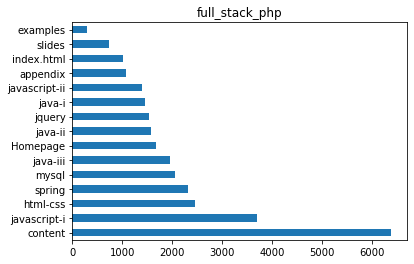

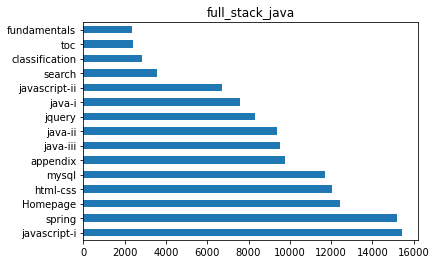

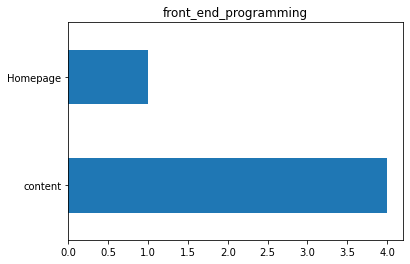

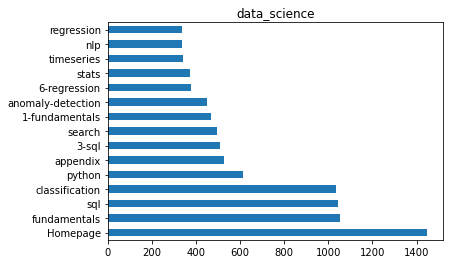

In [24]:
df = explore_q6_df()

for program in df.program_id.unique():
    df[df.program_id==(program)].coursework_topic.value_counts().head(15).plot.barh()
    plt.title(program)
    plt.show()